In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('soybean_JUL14_Clean_File.csv')

data = data.dropna()
data = data.fillna(0)

y = data[['TotalOpenInt']]
X = data.drop(columns=['TotalOpenInt'])

# Convierte las columnas a arreglos numpy
X = X.to_numpy(dtype=np.float32)
y = y.to_numpy(dtype=np.float32)

# Normalizar los datos
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Convierte los datos de numpy a tensores de PyTorch
X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de regresion lineal expresado en una clase
class RegresionLineal(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegresionLineal, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Dimensiones de entrada y salida del modelo
input_size = X.shape[1]  # El número de características en X
output_size = 1

In [ ]:
# Crear una instancia del modelo
modelo = RegresionLineal(input_size, output_size)

In [ ]:
# Definir la función de pérdida (criterio) y el optimizador
criterio = nn.MSELoss()  # Error cuadrático medio
optimizador = optim.SGD(modelo.parameters(), lr=0.01)  # Descenso de gradiente estocástico

In [ ]:
# Entrenamiento del modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = modelo(X_train)
    loss = criterio(outputs, y_train)

    # Backward pass y optimización
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Pérdida: {loss.item():.4f}')

Época [100/1000], Pérdida: 0.9349
Época [200/1000], Pérdida: 0.9213
Época [300/1000], Pérdida: 0.9155
Época [400/1000], Pérdida: 0.9119
Época [500/1000], Pérdida: 0.9096
Época [600/1000], Pérdida: 0.9081
Época [700/1000], Pérdida: 0.9070
Época [800/1000], Pérdida: 0.9062
Época [900/1000], Pérdida: 0.9056
Época [1000/1000], Pérdida: 0.9052


In [ ]:
#Evaluacion del modelo
modelo.eval()
with torch.no_grad():
    predicciones = modelo(X_test)
    print("Predicciones en el conjunto de prueba:")
    print(predicciones)

Predicciones en el conjunto de prueba:
tensor([[ 1.2803e-01],
        [-2.6458e-01],
        [ 1.3526e-01],
        [ 1.5161e-01],
        [-4.3133e-02],
        [-3.0661e-01],
        [-1.7934e-01],
        [ 5.1306e-02],
        [-5.9261e-02],
        [ 3.9347e-01],
        [ 9.2326e-02],
        [-3.5135e-01],
        [-1.5838e-01],
        [-1.1749e-02],
        [ 4.4593e-02],
        [ 7.3951e-02],
        [ 1.7764e-02],
        [-3.3465e-01],
        [-2.4046e-01],
        [ 1.4609e-01],
        [ 7.2306e-02],
        [ 8.5744e-02],
        [ 1.9300e-02],
        [ 1.1612e-01],
        [-2.0736e-02],
        [ 4.7516e-01],
        [-1.1796e-01],
        [-2.6972e-01],
        [-1.8359e-01],
        [-5.2349e-03],
        [ 4.8232e-02],
        [ 1.2032e-01],
        [-2.1129e-02],
        [-6.1586e-02],
        [-2.2124e-01],
        [-3.4186e-02],
        [ 2.4840e-01],
        [ 1.5212e-01],
        [ 1.9400e-01],
        [ 2.3807e-01],
        [-1.9833e-01],
        [ 3.4703e-

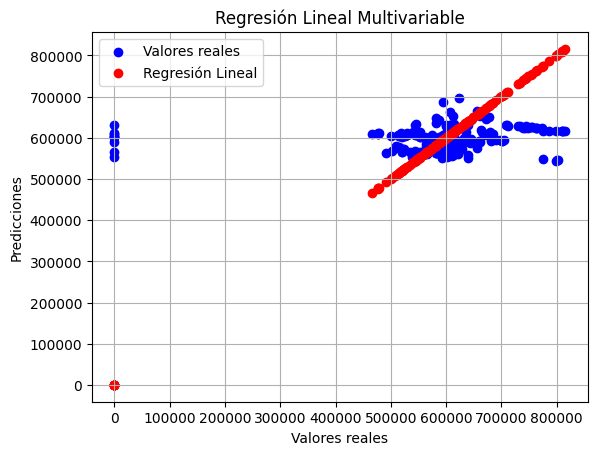

In [ ]:
# Evaluar el modelo en el conjunto de prueba para obtener graficos
modelo.eval()
with torch.no_grad():
    predicciones = modelo(X_test)
    predicciones = scaler_y.inverse_transform(predicciones)  # Inversa de la normalización para obtener valores reales
    y_test = scaler_y.inverse_transform(y_test)  # Inversa de la normalización para obtener valores reales

plt.scatter(y_test, predicciones, label='Valores reales', color='blue')
plt.scatter(y_test, y_test, label='Regresión Lineal', color='red', marker='o')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal Multivariable")
plt.legend()
plt.grid(True)
plt.show()